In [6]:
# Cargo el dataset
circle <- read.csv("circle.csv",header= F)

a <- as.matrix(circle[,-3])
b <- as.matrix(circle[,3])

head(circle)

,V1,V2,V3
,<dbl>,<dbl>,<int>
1,"-0,9719350","0,846927",0
2,"-0,5529950","-0,576830",0
3,"-0,0949043","-0,298862",1
4,"-0,8095640","0,856891",0
5,"0,3990090","0,690462",0
6,"-0,6736180","-0,684443",0


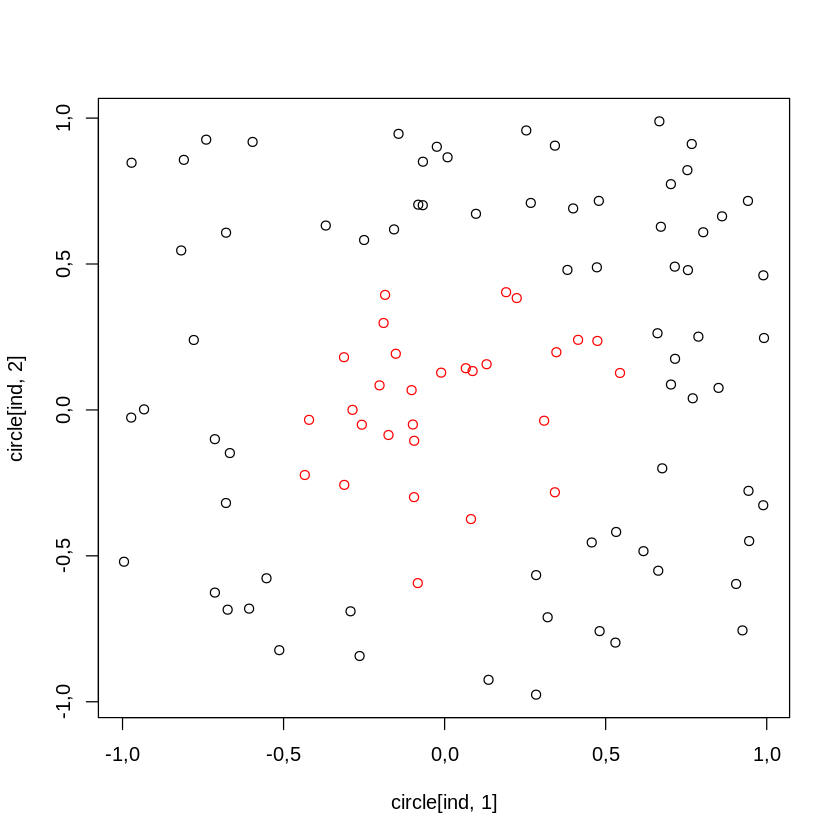

In [7]:
# Miro que pinta tiene
ind = which(circle[,3] == 0)

plot(circle[ind,1],
     circle[ind,2],
     type="p")

lines(circle[-ind,1],
      circle[-ind,2],
      type="p",
      col="red")

In [ ]:
# Defino la función de activación (la sigmoide en este caso)
activation <- function(z) {
    1/(1 + exp(-z))
}

In [228]:
# Defino aquí la función de back propagation

# h = numero de neuronas de la capa oculta
backprop_mlp <- function(x, y, epochs = 10, eta = 0.1, h = c(2)) {
    
    # Inicializar matrices y listas
    errors <- c()
    
    # Añado el bias a los valores de entrada
    x <- cbind(x, rep(1,nrow(x)))
    
    # numero de neuronas de cada capa
    neurons <- c(ncol(x),h,ncol(y))

    # Lista de las matrices de los pesos
    Weights = list()
        
    # length(h) = numero de capas ocultas
    for (i in 1:(length(h)+1)){
        # Creo la lista de matrices de los pesos, con valores generados al azar
        Weights[[i]] <- matrix(data = runif(neurons[i]*neurons[i+1], min = -1, max = 1),
            nrow = neurons[i+1], 
            ncol = neurons[i])
    }
        
    for (j in 1:epochs) {
        
        # Defino las variables que necesito, propagando hacía adelante
        
        # Valores de las neuronas de las capas ocultas
        # h = f(B) = f(W*x)
        h = list()

        # aux = f(B)(1 - f(B)) 
        aux = list()
        
        # Trato los primeros elementos de las lista de manera distinta (h[[1]] quiere x, no h)
        # aux[[1]] no necesita tratamiento especial, pero así meto todo en un solo bucle for
        h[[1]] <- activation(x %*% t(Weights[[1]]))
        aux[[1]] <- h[[1]] * (1 - h[[1]])
        for (i in 2:(length(h)+1)){
            h[[i]] <- activation(h[[i-1]] %*% t(Weights[[i]]))
         #   }

        #for (i in 2:(length(h)+1)){
            aux[[i]] <- activation(h[[i-1]] %*% t(Weights[[i]])) * (1 - activation(h[[i-1]] %*% t(Weights[[i]])))
        }
        #print(aux[[1]])
        #print(aux[[2]])

        # print("aux[[1]]")
        # print(aux[[1]])

        # print("aux[[2]]")
        # print(aux[[2]])

        # valores de salida
        #y_out <- activation(h[[1]] %*% t(Weights[[2]]))
        #print("y_out")
        #print(y_out)
        #print("h[[2]]")
        #print(h[[2]])
        #print("------------")
        # Lista de los DeltaW
        Wdelta = list()
        
        y_out = h[[2]]  #[[length(h)]]
        #print(y_out)
        # error = (b - b^)
        error <- y - y_out
                
        #aux_1 <- y_out * (1 - y_out)
        #print(aux_1) # == aux[[2]]
        
        supp <- list()
        # Calculo los DeltaW
        # Para los pesos de capa oculta a salida: DeltaWeights_2 = - eta * (aux*h_1)
        supp[[2]] <- error * aux[[2]]
        #print(supp[[2]])
        #print(error * aux[[2]])
        
        Wdelta[[2]]  <- t(supp[[2]]) %*% h[[1]]
        Weights[[2]] <- Weights[[2]] + (eta * Wdelta[[2]])
        
        # Para los pesos de entrada a capa oculta: DeltaWeights_1 = - eta * (aux*Weights_2*aux_2*x)
        #aux_2 <- h[[1]] * (1 - h[[1]]) # == aux[[1]]
        
        #print("aux2")
        #print(aux_2)
        
        #aux = list()
        #aux[[1]] = h[[1]]*(1 - h[[1]])
        #print("aux[[1]]")
        #print(aux[[1]])
        
        #print("h[[1]]")
        #print(h[[1]]*(1 - h[[1]]))
        
        supp[[1]] <- (supp[[2]] %*% Weights[[2]]) * aux[[1]]
        Wdelta[[1]]  <- t(supp[[1]]) %*% x #t(((error * aux[[2]]) %*% Weights[[2]]) * aux[[1]]) %*% x
        Weights[[1]] <- Weights[[1]] + (eta * Wdelta[[1]])
                
        # Error output
        errors <- c(errors, sum(error**2))
}
    
### Return values
plot(errors)  
#Weights = list(Weights_1, Weights_2)    
return(Weights)
}

[[1]]
             V1        V2           
[1,]  0,6304592  8,772972 -3,6995422
[2,] -3,3437176  2,263486 -1,8207404
[3,]  5,1284838  4,193619  3,1422186
[4,]  7,1836939 -3,317272 -3,5160872
[5,] -0,5049030 -1,260323  0,3223526

[[2]]
          [,1]      [,2]     [,3]      [,4]      [,5]
[1,] -9,825108 -3,848003 8,521596 -10,64878 -3,061077

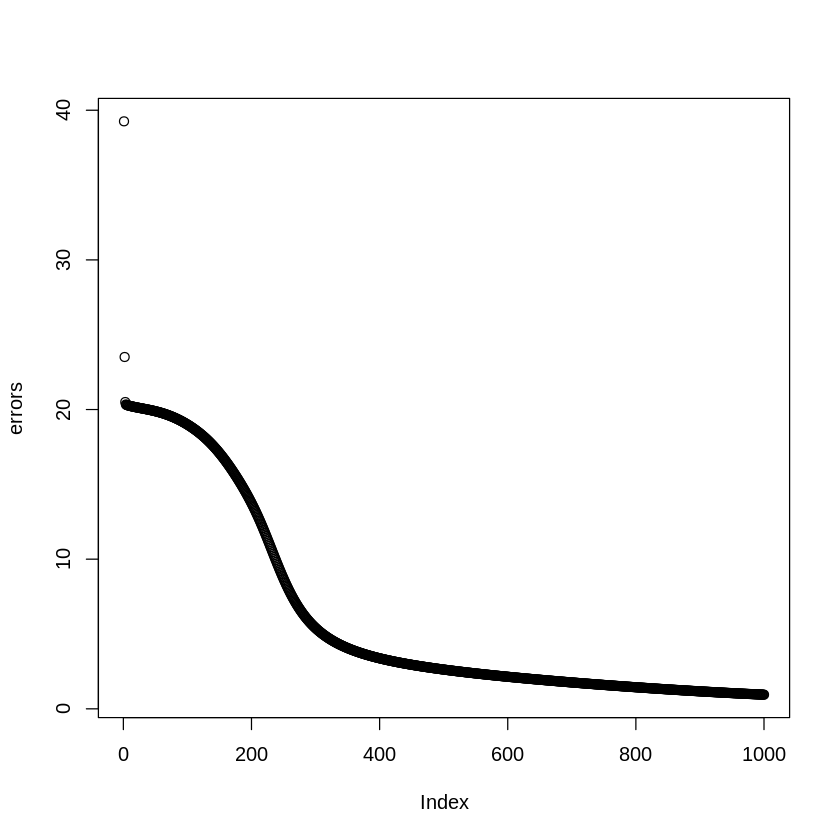

In [229]:
set.seed(1)

backprop_mlp(a, b, h = 5, epochs= 1000, eta = 0.1) 